# Cardiovascular Risk Predection

The objective of this project is to develop a classification model to predict the risk of Coronary Heart Disease (CHD) in 10 years for any given person. It also focuses on concluding an ideal set of methods at pre-processing of the data available in this context, to prepare it for Machine Learning analysis.



---


The dataset contains various set of information of the residents, such as, Demographic - like sex, age, and education; Behavioral - such as the smoking status; and medical information like blood pressure, diabetes, cholesterol level, BMI, glucose, histories of stroke or hypertension, etc; all of which are important predictors of cardiovascular risk.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [ ]:
data= pd.read_csv('data_cardiovascular_risk.csv')
dataset = data.copy()

## Explore Data

In [ ]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,ChestPainType,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,ATA,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,NAP,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,ATA,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,ASY,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,NAP,0


In [ ]:
dataset.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,ChestPainType,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,NaN,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,NaN,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,NaN,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,NaN,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,NaN,0


In [ ]:
dataset.shape

(3390, 18)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  ChestPainType    918 non-null    object 
 17  TenYearCHD    

##Data Dictionary
---
The dataset is from an ongoing cardiovascular study on residents of the town Framingham, Massachusetts. The goal of this project is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The following features (and their type), which are potential factors for CHD risk, utilised in this Cardiovascular Risk assessment are:

####Demographic:
* ***id:*** Personal identification number (Unique)
* ***age:*** Age of the patient (Continuous)
* ***education:*** (Nominal)
* ***sex:*** Male or Female (Nominal)


####Behavioral:
* ***is_smoking:*** Whether or not the patient is a current smoker (Nominal)
* ***cigsPerDay:*** Number of cigarettes smoked by the person per day on average (Continuous)

####Medical (history):
* ***BPMeds:*** Whether or not the patient is on blood pressure medication (Nominal)
* ***prevalentStroke:*** Whether or not the patient previously had a stroke (Nominal)
* ***prevalentHyp:*** Whether or not the patient was hypertensive (Nominal)
* ***diabetes:*** Whether or not the patient has diabetes (Nominal)

####Medical (current):
* ***totChol:*** Total cholesterol level in mg/dL (Continuous)
* ***sysBP:*** systolic blood pressure in mmHg (Continuous)
* ***diaBP:*** diastolic blood pressure in mmHg (Continuous)
* ***BMI:*** Body Mass Index (Continuous)
* ***heartRate:*** Heart rate (Continuous)
* ***glucose:*** glucose level in mg/dL (Continuous).
* ***ChestPainType:***  typical angina, atypical angina, non-anginal pain, asymptomatic (Nominal).

####Target variable to predict:
* ***TenYearCHD:*** 10 year risk of coronary heart disease (CHD) - (Nominal, where “1” means “Yes”, “0” means “No”)

In [ ]:
dataset.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

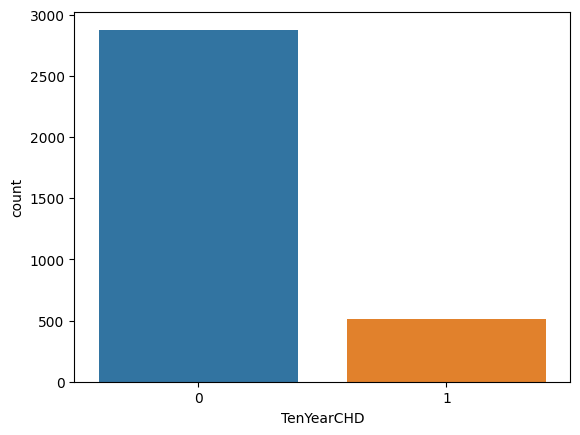

In [ ]:
sns.countplot(x='TenYearCHD',data=dataset)

# Data Preprocessing

###Handling Missing Values

In [ ]:
dataset.isnull().sum()

id                    0
age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              38
sysBP                 0
diaBP                 0
BMI                  14
heartRate             1
glucose             304
ChestPainType      2472
TenYearCHD            0
dtype: int64

<Axes: >

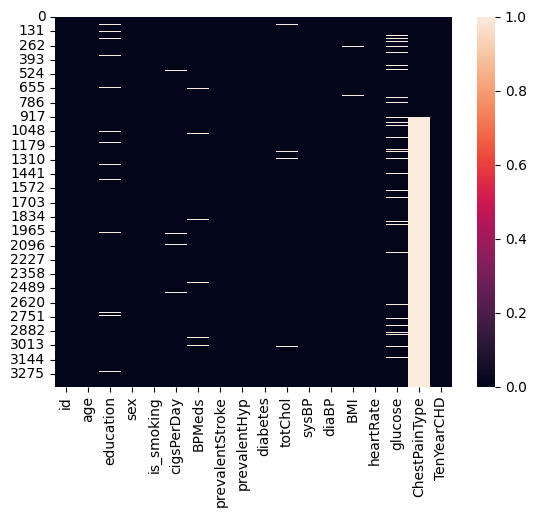

In [ ]:
sns.heatmap(dataset.isnull())

###Data Reduction

In [ ]:
# Drop unnecessary columns

dataset.drop(['id', 'education', 'is_smoking', 'ChestPainType'], axis=1, inplace=True)

In [ ]:
# Drop null records from columns

dataset.dropna(subset=["cigsPerDay"], axis = 0, inplace=True)
dataset.dropna(subset=["BPMeds"], axis = 0, inplace=True)
dataset.dropna(subset=["totChol"], axis = 0, inplace=True)
dataset.dropna(subset=["BMI"], axis = 0, inplace=True)
dataset.dropna(subset=["heartRate"], axis = 0, inplace=True)
dataset.dropna(subset=["glucose"], axis = 0, inplace=True)

In [ ]:
dataset.isnull().sum()

age                0
sex                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

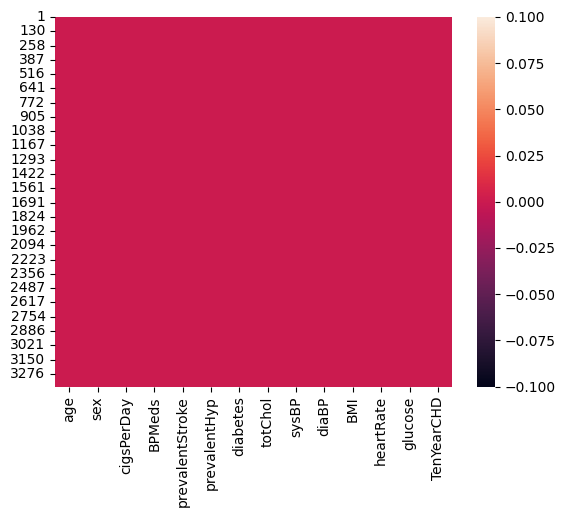

In [ ]:
# After data reduction

sns.heatmap(dataset.isnull())

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 1 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   sex              3004 non-null   object 
 2   cigsPerDay       3004 non-null   float64
 3   BPMeds           3004 non-null   float64
 4   prevalentStroke  3004 non-null   int64  
 5   prevalentHyp     3004 non-null   int64  
 6   diabetes         3004 non-null   int64  
 7   totChol          3004 non-null   float64
 8   sysBP            3004 non-null   float64
 9   diaBP            3004 non-null   float64
 10  BMI              3004 non-null   float64
 11  heartRate        3004 non-null   float64
 12  glucose          3004 non-null   float64
 13  TenYearCHD       3004 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 352.0+ KB


### Encode Categorical Data

In [ ]:
dataset.select_dtypes(include='object')

,sex
1,M
2,F
3,M
4,F
5,F
...,...
3384,F
3385,F
3386,F
3387,M


In [ ]:
dataset['sex'].value_counts()

F    1657
M    1347
Name: sex, dtype: int64

In [ ]:
dataset['sex'] = dataset['sex'].map({'M':1, 'F':0})

In [ ]:
dataset.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


# Exploratory Data Analysis

In [ ]:
dataset.describe()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,49.521305,0.448402,9.078562,0.030293,0.005992,0.314913,0.027297,237.222370,132.591711,82.923103,25.824041,75.816911,81.993009,0.152130
std,8.595076,0.497413,11.890855,0.171421,0.077189,0.464559,0.162974,45.267516,22.270882,12.038348,4.121130,11.937110,24.125814,0.359207
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.057500,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.072500,83.000000,87.000000,0.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
categ_vars = ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
cont_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

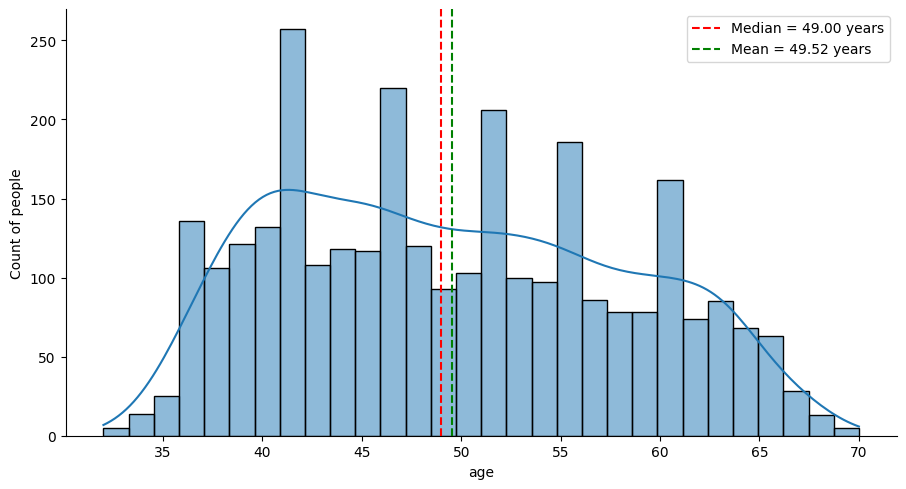

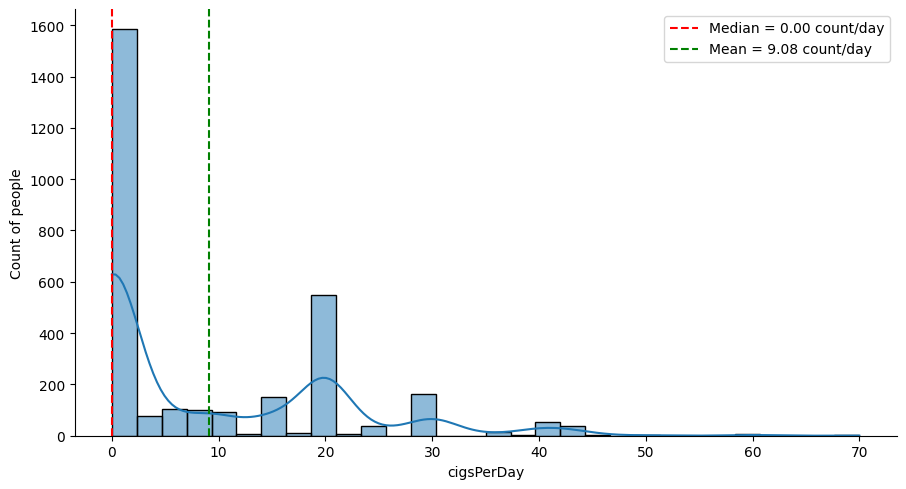

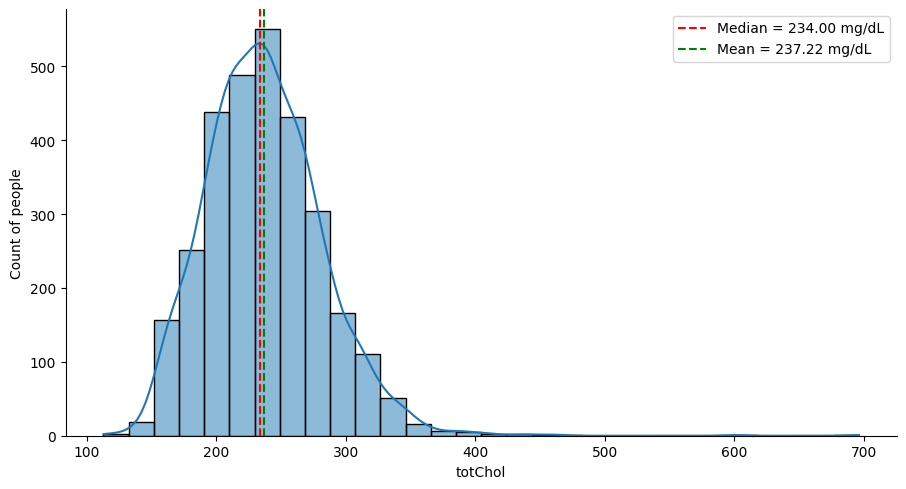

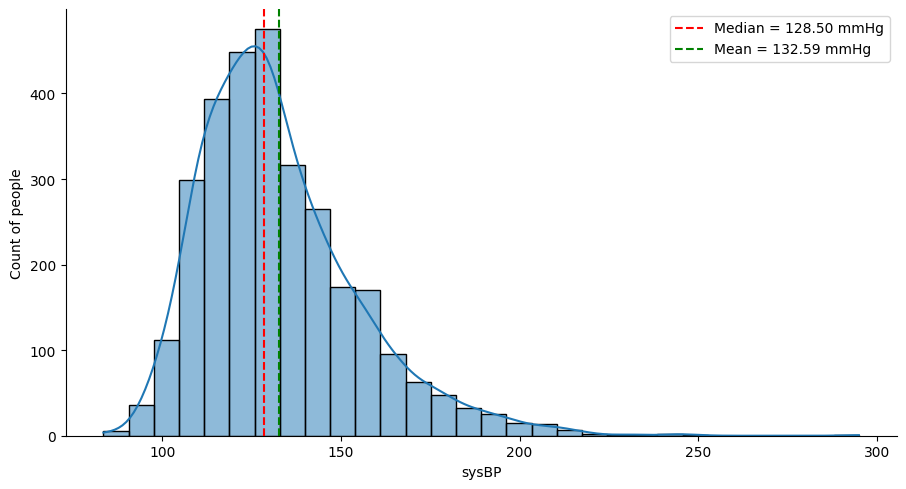

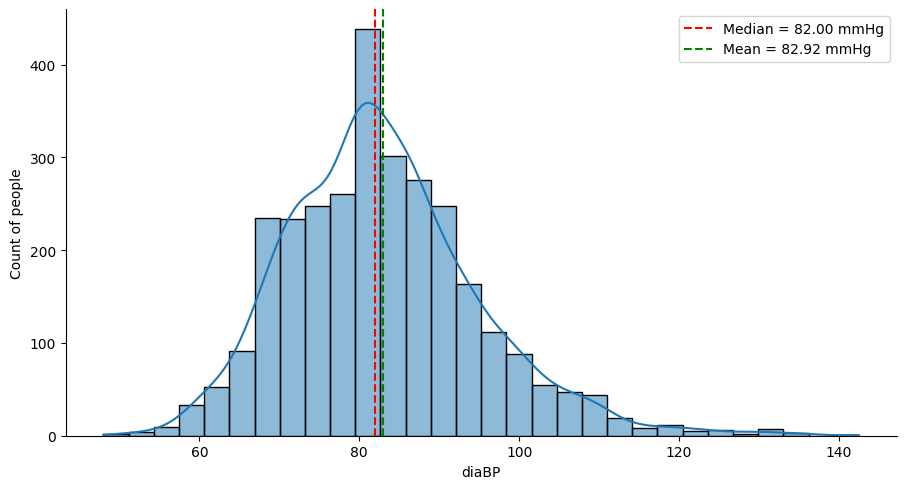

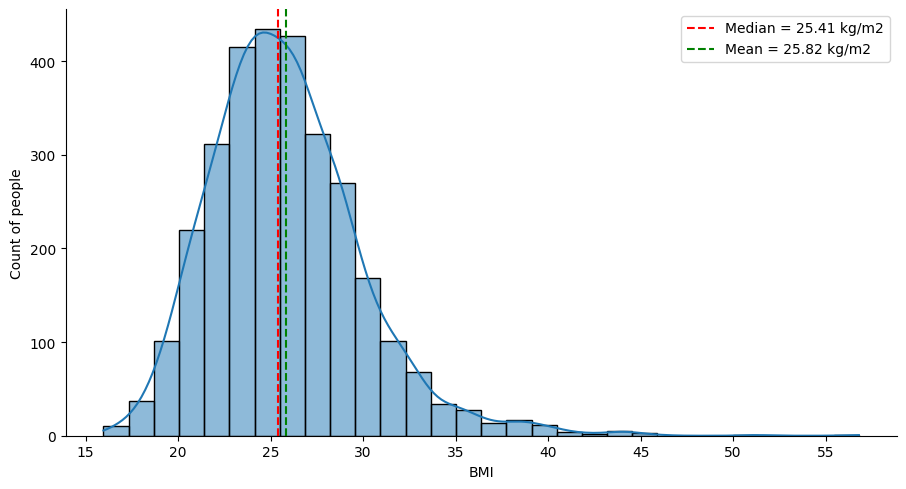

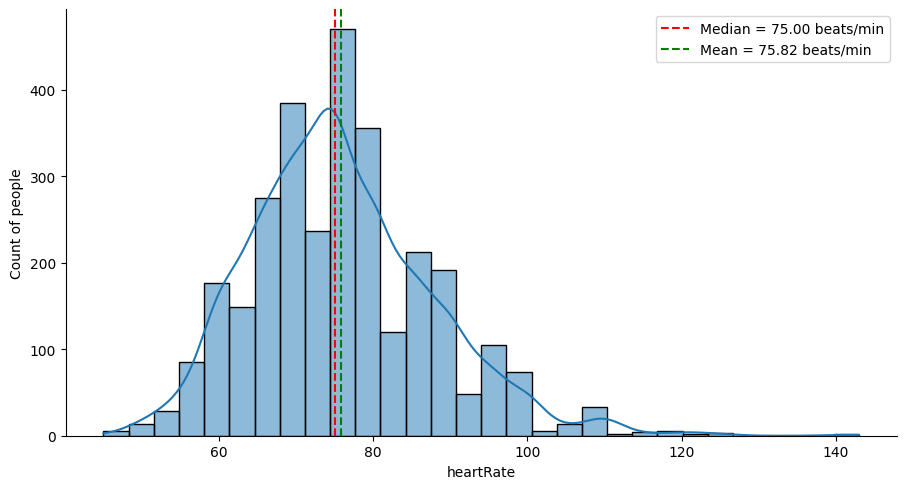

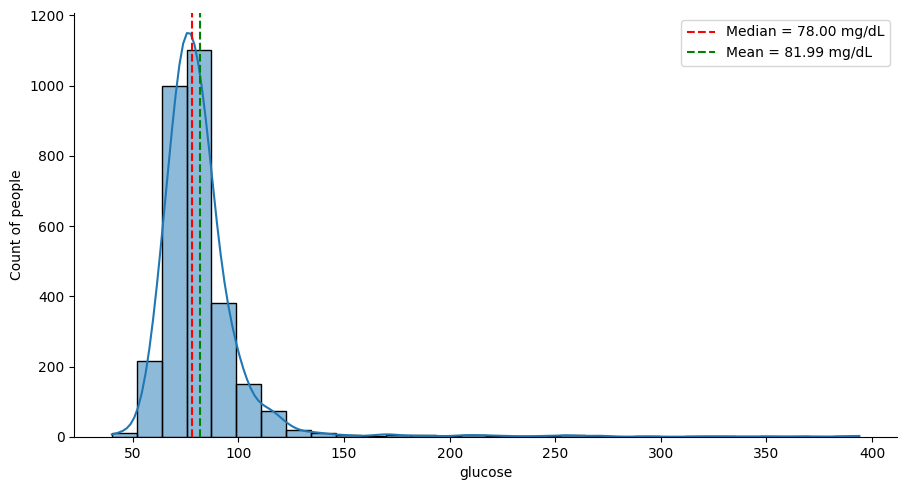

In [ ]:
for var in cont_vars:

  median = True
  mean = True
  units = ['years', 'count/day', 'mg/dL', 'mmHg', 'mmHg', 'kg/m2', 'beats/min', 'mg/dL']
  cont_var_units = dict(zip(cont_vars, units))
  unit = cont_var_units[var]

  sns.displot(dataset[var], height = 5, aspect = 11/6, bins = 30, kde = True)

  if median == True:
      plt.axvline(dataset[var].median(), color = 'red', linestyle = '--', label = f'Median = {dataset[var].median():.2f} {unit}')
  if mean == True:
      plt.axvline(dataset[var].mean(), color = 'green', linestyle = '--', label = f'Mean = {dataset[var].mean():.2f} {unit}')

  plt.ylabel('Count of people')
  plt.xlabel(var)
  plt.legend()
  plt.show()

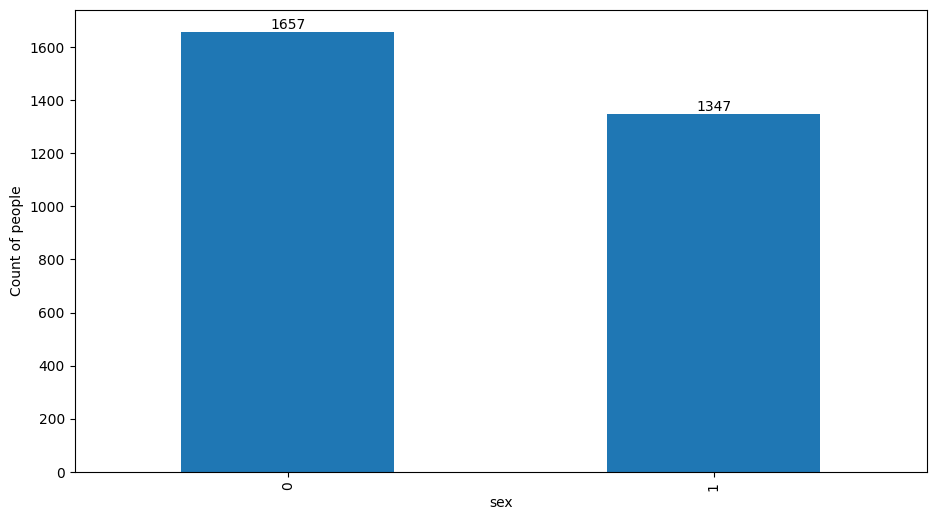

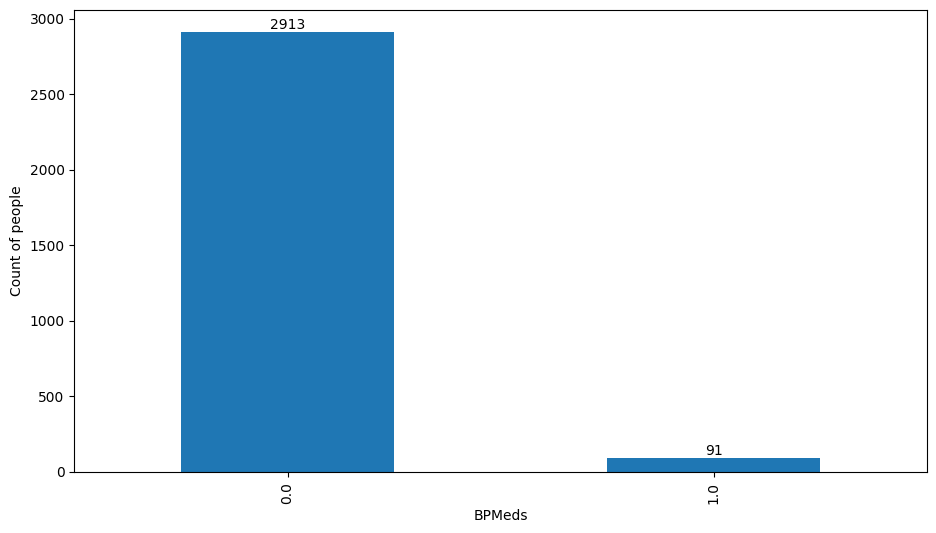

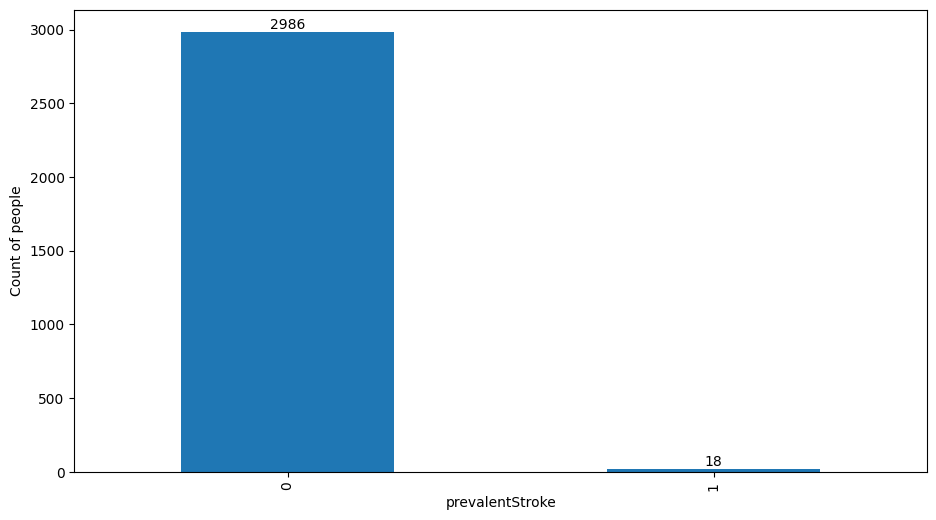

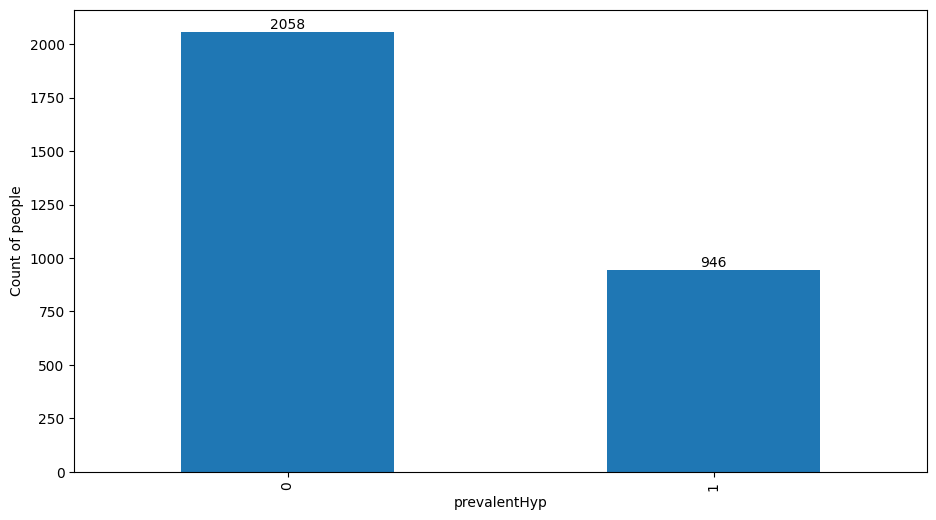

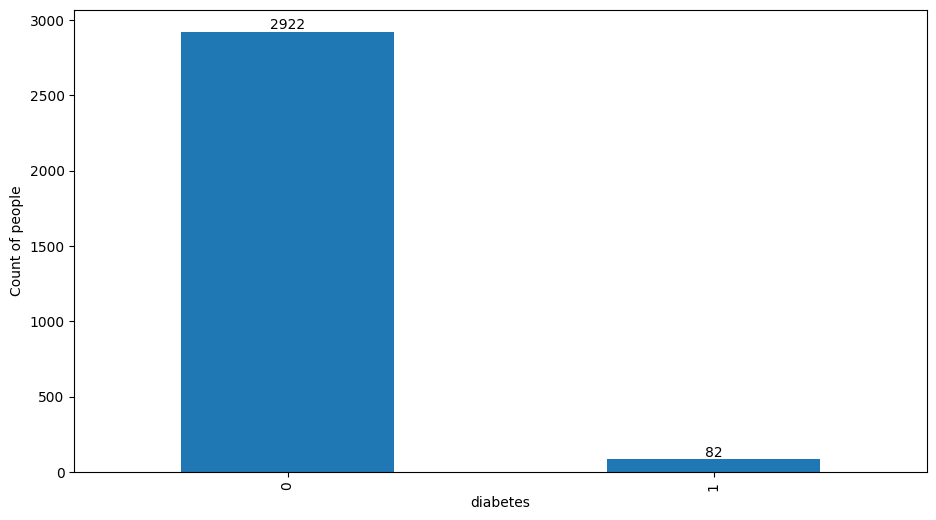

In [ ]:
for var in categ_vars:
  plt.figure(figsize = (11, 6))
  ax = dataset[var].value_counts().plot(kind = 'bar')

  for bar in ax.patches: # iterate through each bar in the plot
    height = bar.get_height()
    plt.annotate(str(height), xy=(bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom') # add the height as text at the center of the bar

    plt.ylabel('Count of people')
    plt.xlabel(var)

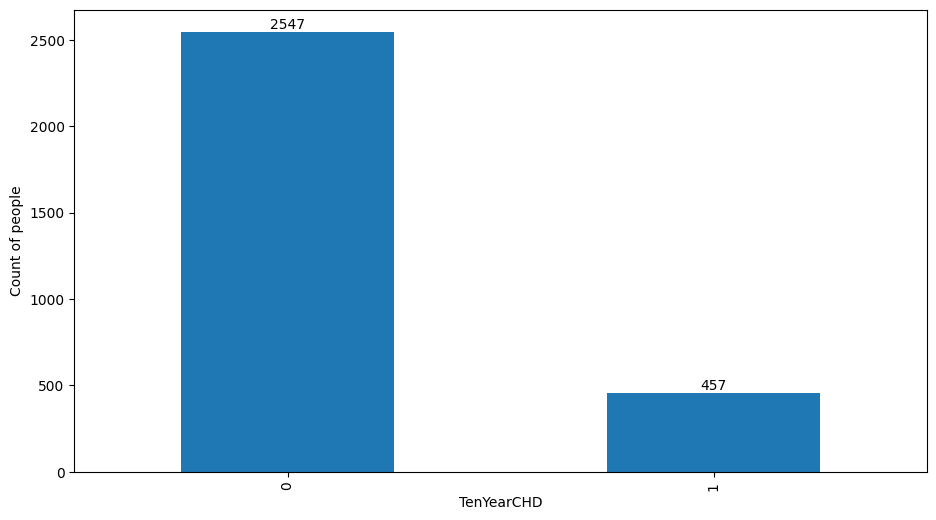

In [ ]:
var = 'TenYearCHD'
plt.figure(figsize = (11, 6))
ax = dataset[var].value_counts().plot(kind = 'bar')

for bar in ax.patches: # iterate through each bar in the plot
    height = bar.get_height()
    plt.annotate(str(height), xy=(bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom') # add the height as text at the center of the bar

    plt.ylabel('Count of people')
    plt.xlabel(var)

<Axes: >

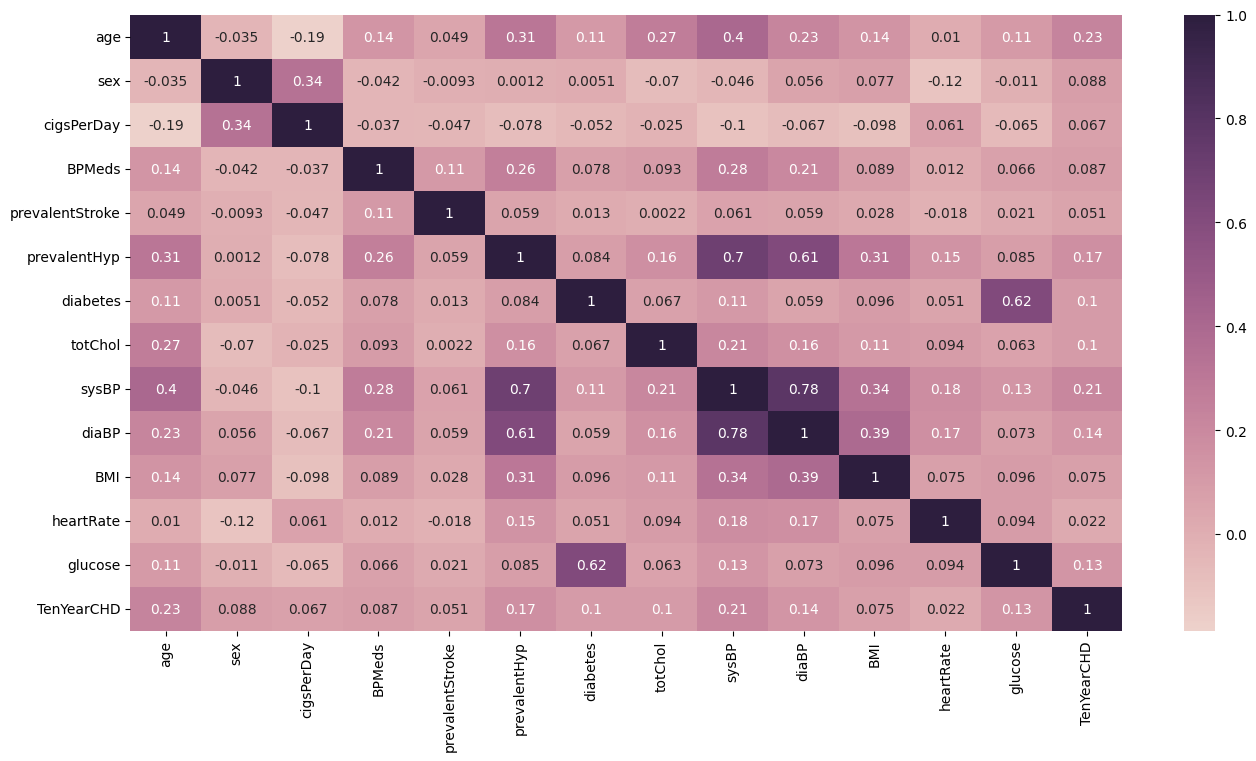

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(dataset.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True))

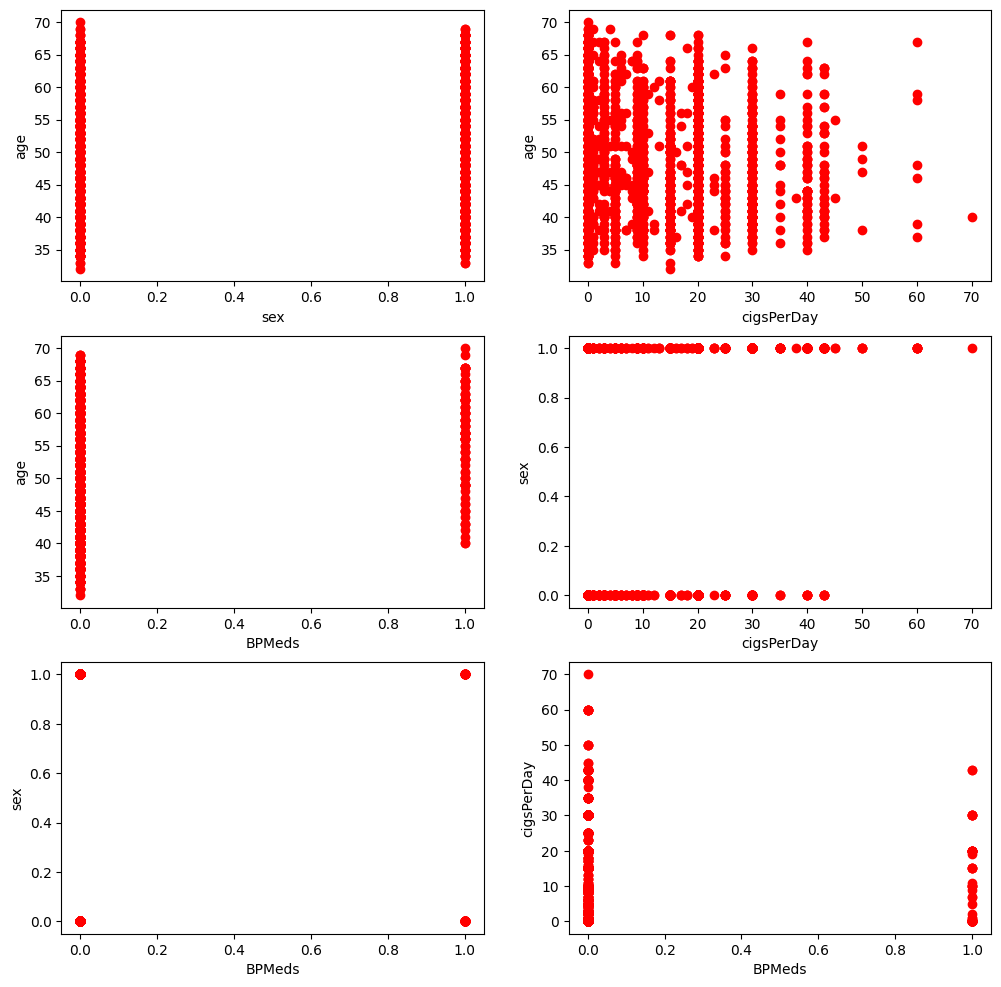

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(dataset[dataset.columns[j]], dataset[dataset.columns[i]], color='red')
        axes[ax1][ax2].set_xlabel(dataset.columns[j])
        axes[ax1][ax2].set_ylabel(dataset.columns[i])
        index = index + 1

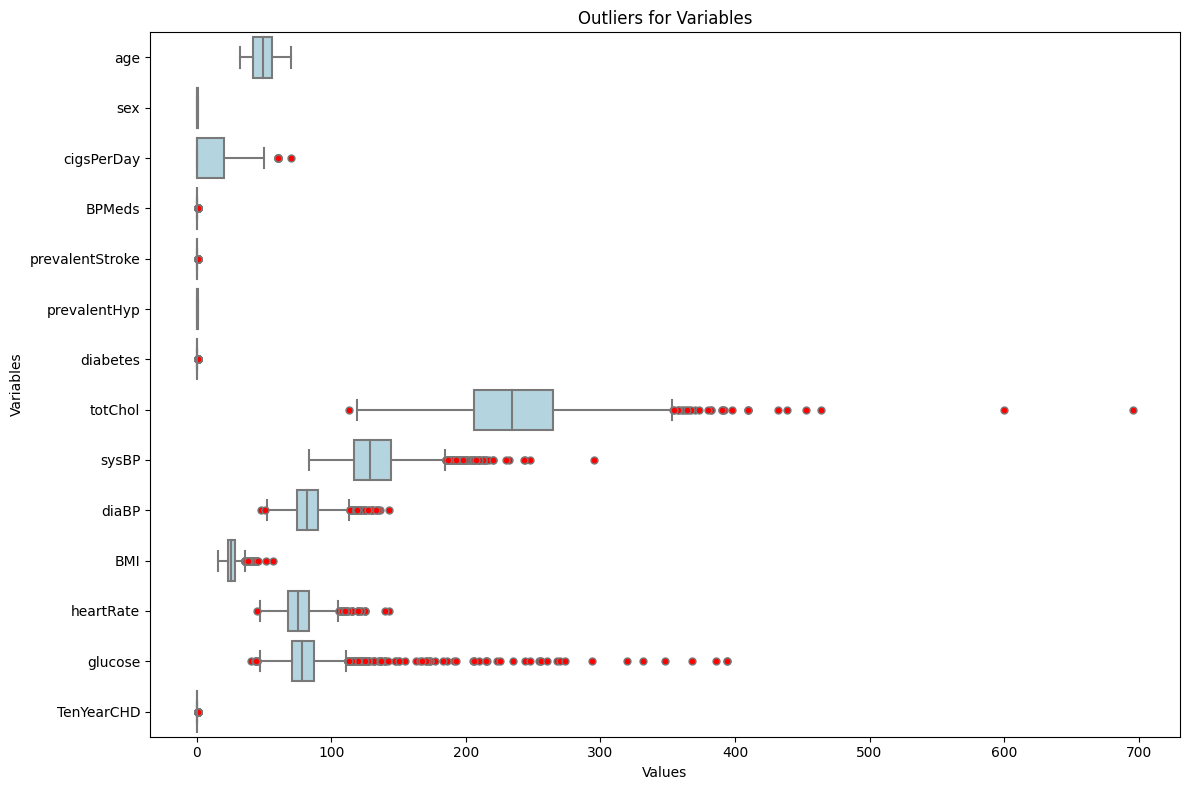

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset, orient='h', color='lightblue', flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5})
plt.title('Outliers for Variables')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

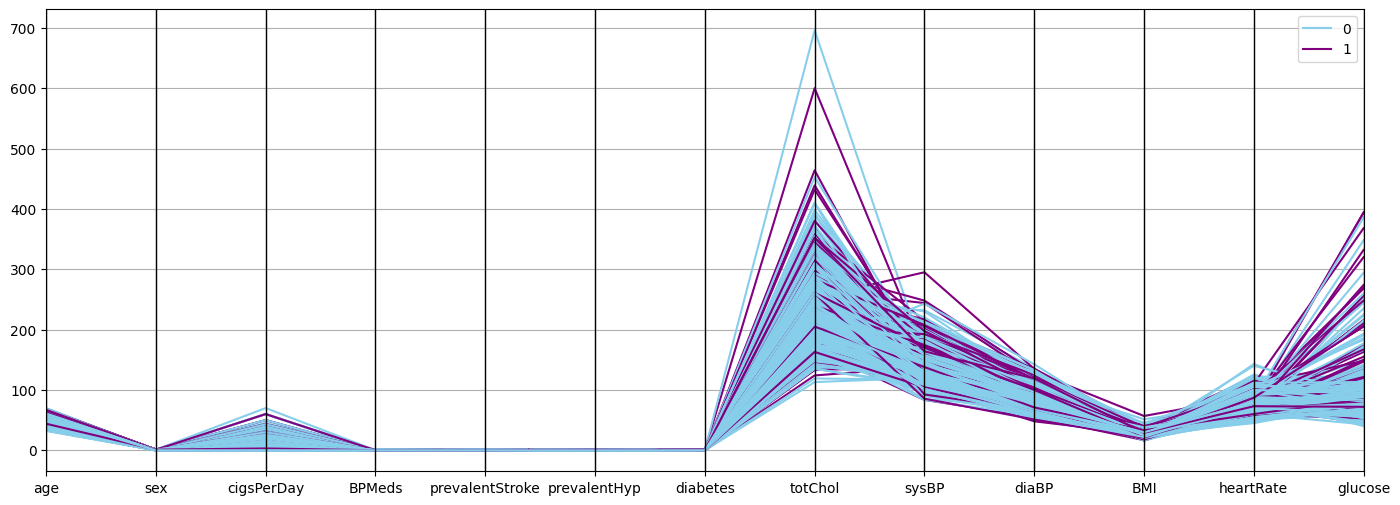

In [ ]:
from pandas.plotting import parallel_coordinates
%matplotlib inline
plt.figure(figsize=(17, 6))
parallel_coordinates(dataset, 'TenYearCHD', color=('skyblue', 'Purple'))
plt.show

## Normalization

In [ ]:
# Normalize data ranges for all features (between 0 and 1)

dataset = dataset.divide(dataset.max())

# Building Model

## Importing Libraries for Algorithms & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

#Libraries for the four algorithms we will use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
import xgboost as xgb

#Function to evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Spliting Data into *Train & Test***

In [ ]:
X = dataset.drop('TenYearCHD', axis=1)
y = dataset['TenYearCHD']

print(X.shape, y.shape)

(3004, 13) (3004,)


In [ ]:
# Splitting the dataset using train test split
X_train, X_test ,y_train ,y_test = train_test_split (X, y, test_size = 0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2403, 13)
(601, 13)
(2403,)
(601,)


In [ ]:
X_train.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3353,0.714286,0.0,0.000000,0.0,0.0,1.0,0.0,0.370690,0.488136,0.617544,0.425880,0.699301,0.210660
1538,0.800000,1.0,0.285714,0.0,0.0,0.0,0.0,0.267241,0.393220,0.470175,0.433451,0.489510,0.210660
2201,0.557143,0.0,0.000000,0.0,0.0,0.0,0.0,0.258621,0.420339,0.582456,0.403345,0.461538,0.195431
2035,0.600000,0.0,0.128571,0.0,0.0,0.0,0.0,0.287356,0.403390,0.526316,0.403345,0.398601,0.175127
879,0.842857,0.0,0.000000,0.0,0.0,0.0,0.0,0.346264,0.406780,0.512281,0.418310,0.419580,0.223350


In [ ]:
X_test.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
809,0.814286,0.0,0.042857,0.0,0.0,0.0,0.0,0.337644,0.428814,0.561404,0.438028,0.580420,0.182741
2686,0.828571,0.0,0.000000,0.0,0.0,0.0,0.0,0.329023,0.433898,0.533333,0.572007,0.475524,0.190355
195,0.542857,1.0,0.714286,0.0,0.0,0.0,0.0,0.431034,0.406780,0.519298,0.505986,0.489510,0.197970
60,0.542857,0.0,0.000000,0.0,0.0,0.0,0.0,0.267241,0.355932,0.400000,0.371479,0.594406,0.172589
642,0.528571,0.0,0.285714,0.0,0.0,0.0,0.0,0.221264,0.359322,0.417544,0.399824,0.503497,0.126904


## **1.** Logistic Regression Algorithm

In [ ]:
LR_model = LogisticRegression()

# Fit the model to the training data
LR_model.fit(X_train, y_train)

# Make predictions on the test set
LR_pred = LR_model.predict(X_test)
LR_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
Accuracy_LR = accuracy_score(LR_pred, y_test)
print("Accuracy:", Accuracy_LR)

Accuracy: 0.8635607321131448


In [ ]:
print(classification_report(LR_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93       599
         1.0       0.02      1.00      0.05         2

    accuracy                           0.86       601
   macro avg       0.51      0.93      0.49       601
weighted avg       1.00      0.86      0.92       601



## **2.** Random Forest Algorithm

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
RF_model.fit(X_train, y_train)

# Make predictions on the test set
RF_pred = RF_model.predict(X_test)
RF_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
Accuracy_RF = accuracy_score(RF_pred, y_test)
Accuracy_RF

0.8552412645590682

In [ ]:
print(classification_report(RF_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       590
         1.0       0.05      0.36      0.08        11

    accuracy                           0.86       601
   macro avg       0.52      0.61      0.50       601
weighted avg       0.97      0.86      0.91       601



## **3.** Decision Tree Algorithm

In [ ]:
DT_model = DecisionTreeClassifier()

# Fit the model to the training data
DT_model.fit(X_train, y_train)

# Make predictions on the test set
DT_pred = DT_model.predict(X_test)
DT_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [ ]:
Accuracy_DT = accuracy_score(DT_pred, y_test)
Accuracy_DT

0.7603993344425957

In [ ]:
print(classification_report(DT_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       491
         1.0       0.30      0.23      0.26       110

    accuracy                           0.76       601
   macro avg       0.57      0.55      0.56       601
weighted avg       0.74      0.76      0.75       601



## **4.** Extreme Gradient Boosting Algorithm

In [ ]:
GB_model = xgb.XGBClassifier(n_estimators=200)

# Fit the model to the training data
GB_model.fit(X_train, y_train)

# Make predictions on the test set
GB_pred = GB_model.predict(X_test)
GB_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Accuracy_GB = accuracy_score(GB_pred, y_test)
Accuracy_GB

0.8386023294509152

In [ ]:
print(classification_report(GB_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       566
           1       0.13      0.31      0.18        35

    accuracy                           0.84       601
   macro avg       0.54      0.59      0.55       601
weighted avg       0.91      0.84      0.87       601



## Comparing Accuracies of algorithms

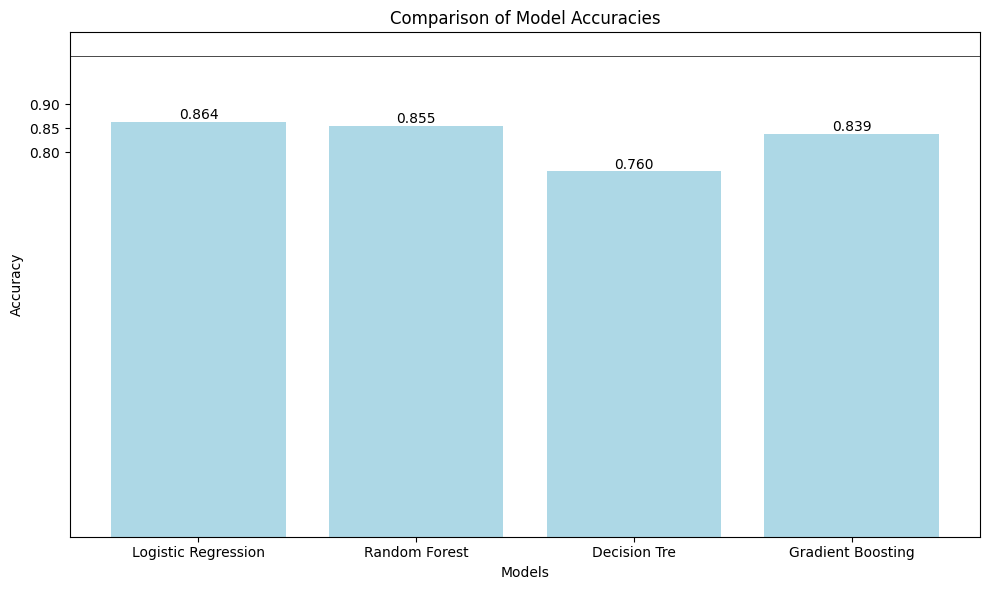

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tre', 'Gradient Boosting']
accuracies = [Accuracy_LR, Accuracy_RF, Accuracy_DT, Accuracy_GB]


plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['lightblue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.axhline(y=1, color='black', linewidth=0.5)
plt.xticks(model_names)
plt.yticks([0.8, 0.85, 0.9])


for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.005, f"{accuracies[i]:.3f}", ha = 'center')


plt.tight_layout()
plt.show()

# ***Thank you!***